In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import os
os.environ["OMP_NUM_THREADS"] = '1'
from sklearn.preprocessing import StandardScaler


In [2]:
df=pd.read_csv("mobile_data.csv")
df

,X,Y,Z
0,0.014579,-0.014945,1.007415
1,0.014091,0.001891,1.008879
2,0.014823,0.000183,1.011807
3,0.014091,0.001159,1.011807
4,0.014579,-0.012749,1.001071
...,...,...,...
95,0.015799,0.000183,1.010587
96,0.013847,0.000427,1.011319
97,0.016043,0.000427,1.012295
98,0.014823,-0.000793,1.010587


In [3]:
df.head()

,X,Y,Z
0,0.014579,-0.014945,1.007415
1,0.014091,0.001891,1.008879
2,0.014823,0.000183,1.011807
3,0.014091,0.001159,1.011807
4,0.014579,-0.012749,1.001071


In [4]:
df.isnull().sum()

X    0
Y    0
Z    0
dtype: int64

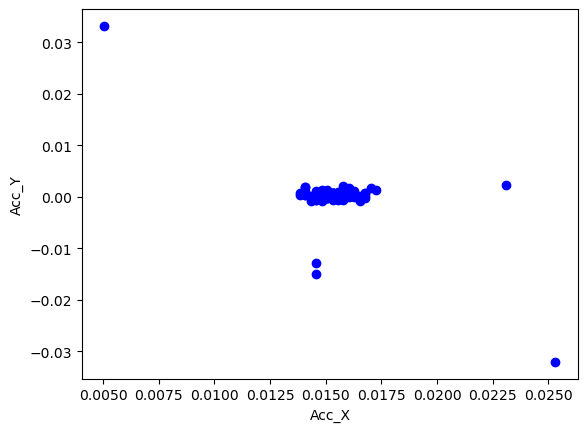

In [23]:
plt.scatter(df['X'],df['Y'], color = 'blue')
plt.xlabel("Acc_X")
plt.ylabel("Acc_Y")
plt.show()


Text(0, 0.5, 'Acc_Z')

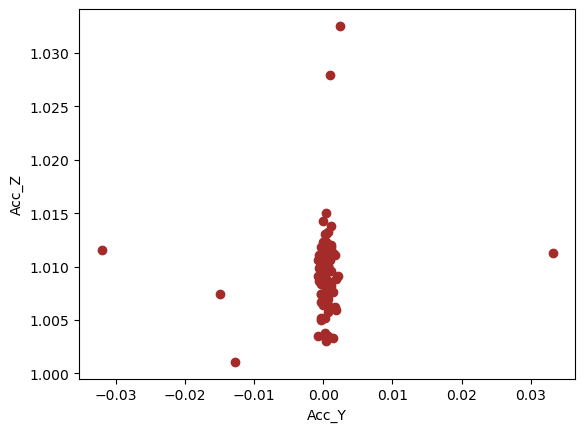

In [24]:
plt.scatter(df["Y"],df["Z"], color = 'brown')
plt.xlabel("Acc_Y")
plt.ylabel("Acc_Z")

In [7]:
relevant_cols = ["X","Y","Z"]

final_df = df[relevant_cols]
final_df

,X,Y,Z
0,0.014579,-0.014945,1.007415
1,0.014091,0.001891,1.008879
2,0.014823,0.000183,1.011807
3,0.014091,0.001159,1.011807
4,0.014579,-0.012749,1.001071
...,...,...,...
95,0.015799,0.000183,1.010587
96,0.013847,0.000427,1.011319
97,0.016043,0.000427,1.012295
98,0.014823,-0.000793,1.010587


In [8]:
scaler = StandardScaler()
scaler.fit(final_df)

StandardScaler()

In [9]:
scaled_data = scaler.transform(final_df)
scaled_data

array([[-0.46128391, -2.9749853 , -0.53177541],
       [-0.73504371,  0.34922248, -0.16545644],
       [-0.32440485,  0.01198401,  0.56720576],
       [-0.73504371,  0.20469171,  0.56720576],
       [-0.46128391, -2.54139317, -2.1192064 ],
       [ 4.3295022 ,  0.44557633,  5.75682218],
       [-0.18752524,  0.20469171,  0.62825905],
       [-0.46128391, -0.03619291, -0.16545644],
       [ 0.22311418, -0.03619291,  0.0787562 ],
       [-0.32440485, -0.08436983, -0.04335012],
       [-0.46128391,  0.06016094, -0.28756277],
       [-0.18752524,  0.10833786,  0.26191556],
       [-0.32440485,  0.15651479,  0.38402188],
       [ 0.49687286, -0.03619291, -0.5928287 ],
       [ 0.22311418, -0.03619291,  0.26191556],
       [-0.18752524, -0.08436983, -0.10440341],
       [-0.18752524,  0.15651479,  0.26191556],
       [ 0.35999324,  0.10833786, -0.65390625],
       [ 1.04439134,  0.25286864, -1.56970355],
       [ 0.35999324,  0.06016094, -1.56970355],
       [ 0.63375304, -0.18072368, -1.508

In [10]:
def find_best_clusters(df, maximum_K):
    clusters_centers = []
    k_values = []
    for k in range(1, maximum_K):
        kmeans_model = KMeans(n_clusters = k)
        kmeans_model.fit(df)
        clusters_centers.append(kmeans_model.inertia_)
        k_values.append(k)
    return clusters_centers, k_values

In [11]:
clusters_centers, k_values = find_best_clusters(scaled_data, 12)

C:\Users\Sap\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [16]:
def generate_elbow_plot(clusters_centers, k_values):

    figure = plt.subplots(figsize = (12, 6))
    plt.plot(k_values, clusters_centers, 'o-', color = 'skyblue')
    plt.xlabel("Number of Clusters (K)")
    plt.ylabel("Cluster Inertia")
    plt.title("Elbow Plot of KMeans")
    plt.show()

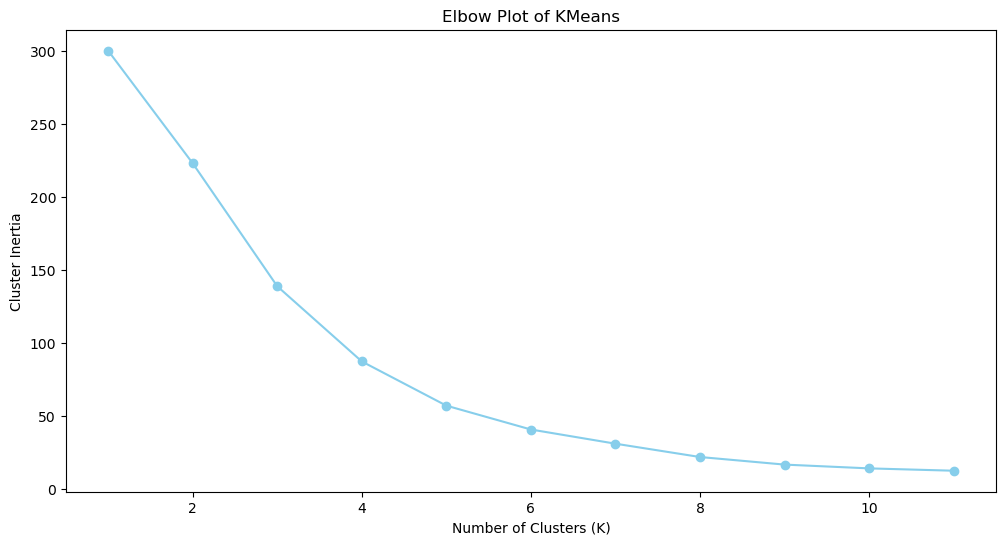

In [17]:
generate_elbow_plot(clusters_centers, k_values)